# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [525]:
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from fuzzywuzzy import fuzz,process

In [526]:
!pip install fuzzywuzzy

In [527]:
from google.colab import files
uploaded=files.upload()



Saving candyhierarchy2017.xlsx to candyhierarchy2017 (7).xlsx


In [528]:
import warnings
warnings.filterwarnings('ignore', category = UserWarning, module ='openpyxl')

In [529]:
df=pd.read_excel("candyhierarchy2017.xlsx")

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [530]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


# 2- show some general properties for the data

In [531]:
df.shape

(2460, 120)

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

In [533]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [534]:
df.dtypes
#there are wrong datatypes as age :)object and more

Internal ID                   int64
Q1: GOING OUT?               object
Q2: GENDER                   object
Q3: AGE                      object
Q4: COUNTRY                  object
                             ...   
Q12: MEDIA [Daily Dish]     float64
Q12: MEDIA [Science]        float64
Q12: MEDIA [ESPN]           float64
Q12: MEDIA [Yahoo]          float64
Click Coordinates (x, y)     object
Length: 120, dtype: object

In [535]:
df.isna().sum()/len(df)
#most cols have missing values.

Internal ID                 0.000000
Q1: GOING OUT?              0.044715
Q2: GENDER                  0.016667
Q3: AGE                     0.034146
Q4: COUNTRY                 0.026016
                              ...   
Q12: MEDIA [Daily Dish]     0.965447
Q12: MEDIA [Science]        0.446341
Q12: MEDIA [ESPN]           0.959756
Q12: MEDIA [Yahoo]          0.972764
Click Coordinates (x, y)    0.347561
Length: 120, dtype: float64

In [536]:
for i in range(len(df.isnull().sum())):
    if df.isna().sum()[i] >1229 :
          print(f"Column {df.isna().sum().index[i]} contains {df.isna().sum()[i]} nan value\n")

Column Q7: JOY OTHER contains 1549 nan value

Column Q8: DESPAIR OTHER contains 1743 nan value

Column Q9: OTHER COMMENTS contains 2074 nan value

Column Unnamed: 113 contains 2451 nan value

Column Q12: MEDIA [Daily Dish] contains 2375 nan value

Column Q12: MEDIA [ESPN] contains 2361 nan value

Column Q12: MEDIA [Yahoo] contains 2393 nan value



In [537]:
df.duplicated().sum()
#Dataset has no complete duplicates

0

# cleaning

### 4- drop all the useless columns and  rows with too much NaN ,
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN
- rename columns for easy access

In [538]:
df.drop(columns=["Internal ID","Q7: JOY OTHER","Q8: DESPAIR OTHER","Q9: OTHER COMMENTS","Unnamed: 113","Click Coordinates (x, y)"],inplace=True)

In [539]:
newNames = {"Q1: GOING OUT?" :"going out", "Q2: GENDER": "gender", "Q3: AGE": "age", "Q4: COUNTRY": "country","Q5: STATE, PROVINCE, COUNTY, ETC":"area",
            "Q10: DRESS" : "dress","Q11: DAY": "day",'Q12: MEDIA [Science]':'Science',
'Q12: MEDIA [Daily Dish]':'Daily Dish', 'Q12: MEDIA [ESPN]':'ESPN',
'Q12: MEDIA [Yahoo]':'Yahoo'}

df.rename(columns = newNames, inplace= True)

In [540]:
df.columns = df.columns.str.strip('Q6 |')

In [541]:
df.sample(3)

,going out,gender,age,country,area,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day,Daily Dish,Science,ESPN,Yahoo
1991,No,Male,25,canada,ontario,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1084,No,Male,28,United States of America,California,JOY,DESPAIR,MEH,MEH,MEH,...,JOY,DESPAIR,JOY,JOY,White and gold,Sunday,NaN,1.0,NaN,NaN
2028,NaN,Male,28,United States,Pennsylvania,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Friday,NaN,NaN,NaN,NaN


### 5 - clean `going out` column
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [542]:
df["going out"].describe()

count     2350
unique       2
top         No
freq      2038
Name: going out, dtype: object

In [543]:
df["going out"].fillna("MayBe",inplace= True)


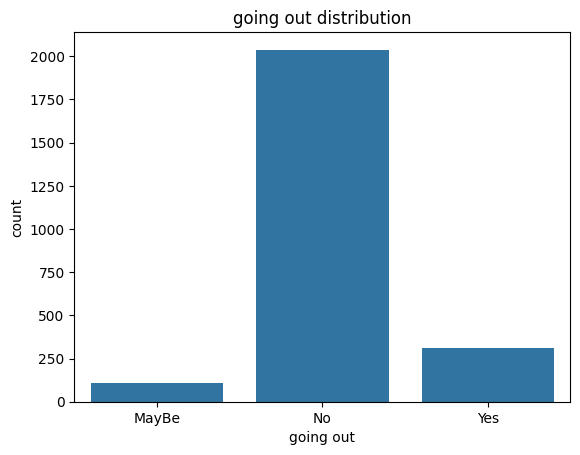

In [544]:
sns.countplot(x="going out",data=df)
plt.title("going out distribution")
plt.show()

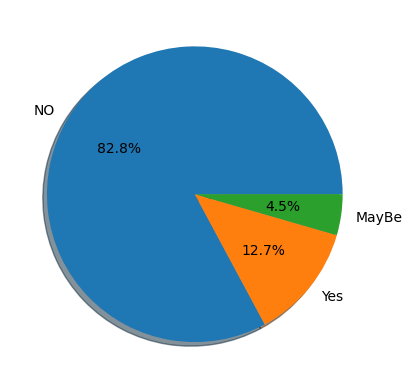

In [545]:
values =df["going out"].value_counts()
plt.pie(values, labels = ["NO", "Yes", "MayBe"],shadow = True,autopct="%1.1f%%")
plt.show()

Most of people will not going out

### 6 - clean ` gender` column
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [546]:
df["gender"].unique()



array([nan, 'Male', 'Female', "I'd rather not say", 'Other'], dtype=object)

In [547]:
df["gender"].fillna("I'd rather not say",inplace= True)

In [548]:
df["gender"].replace("Other","I'd rather not say", inplace= True)

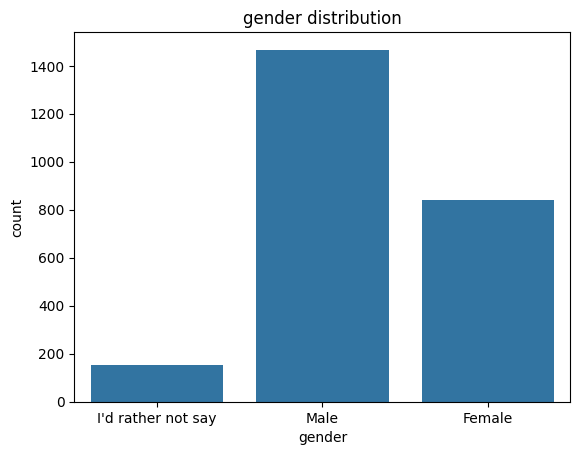

In [549]:
sns.countplot(x="gender",data=df)
plt.title("gender distribution")
plt.show()

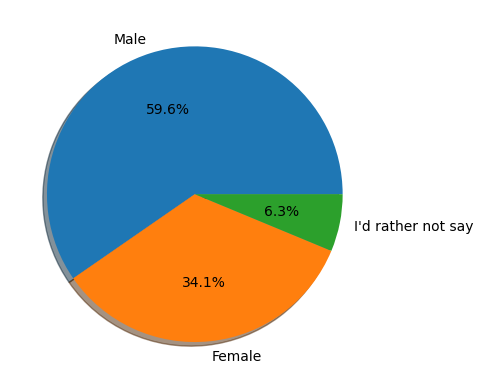

In [550]:
values =df["gender"].value_counts()
plt.pie(values, labels = ["Male", "Female", "I'd rather not say"],shadow = True,autopct="%1.1f%%")
plt.show()

Most of people are Male

### 7 - clean ` age` column
> tip : note the type of age column , and NaN values
 - try to use `to_numeric`
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [551]:
df["age"].unique()

array([nan, 44, 49, 40, 23, 53, 33, 43, 56, 64, 37, 59, 48, 54, 36, 45,
       25, 34, 35, 38, 58, 50, 47, 16, 52, 63, 65, 41, 27, 31, 61, 46, 42,
       62, 29, 39, 32, 28, 69, 67, 30, 22, 26, 51, 70, 24, 18, 19,
       'Old enough', 57, 60, 66, 12, 'Many', 55, 72, '?', 21, 11, 'no', 9,
       68, 20, 6, 10, 71, 90, 13, '45-55', 312, 99, 7, 'hahahahaha', 88,
       39.4, 74, 102, 'older than dirt', 17, 15, 8, 75, '5u', 'Enough',
       'See question 2', '24-50', 14, 'Over 50', 100, 76, 1000,
       'sixty-nine', '46 Halloweens.', 'ancient', 77, 'OLD', 'old', 73,
       70.5, 1, 'MY NAME JEFF', 4, '59 on the day after Halloween',
       'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [552]:
df['age'] = pd.to_numeric(df["age"], errors = "coerce")

In [553]:
df["age"].dtypes

dtype('float64')

In [554]:
df["age"].isna().sum()/len(df)

0.04390243902439024

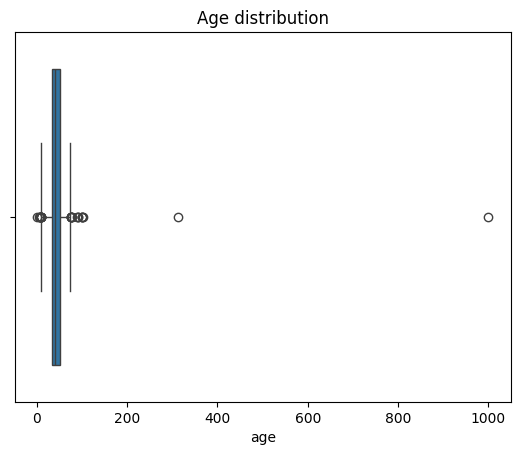

In [555]:
sns.boxplot(x = "age", data = df)
plt.title("Age distribution")
plt.show()

In [556]:
df[df["age"]>100]

,going out,gender,age,country,area,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day,Daily Dish,Science,ESPN,Yahoo
506,No,I'd rather not say,312.0,Canada,BC,MEH,MEH,JOY,DESPAIR,MEH,...,MEH,MEH,MEH,JOY,Blue and black,Sunday,NaN,1.0,NaN,NaN
884,No,I'd rather not say,102.0,A,A,MEH,DESPAIR,JOY,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Blue and black,Friday,NaN,1.0,NaN,NaN
1502,Yes,I'd rather not say,1000.0,Atlantis,"Emerald City, Petrolia",MEH,JOY,JOY,MEH,MEH,...,JOY,MEH,MEH,MEH,White and gold,Friday,NaN,1.0,NaN,NaN


In [557]:
df["age"][df["age"]>90]=mp.nan

<ipython-input-557-5a7761914719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["age"][df["age"]>90]=mp.nan


In [558]:
impute=round(df["age"].mean())
impute

42

In [559]:
df["age"].fillna(impute,inplace=True)

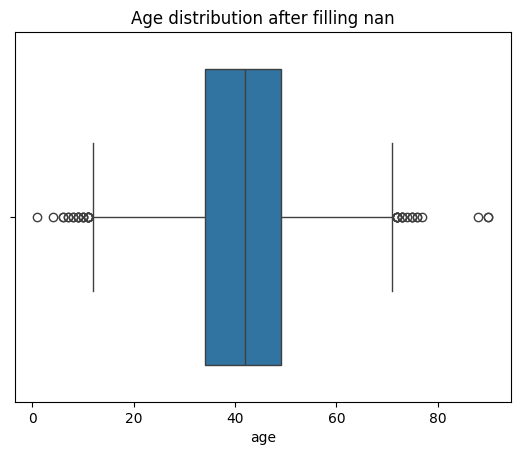

In [560]:
sns.boxplot(x = "age", data = df)
plt.title("Age distribution after filling nan")
plt.show()

Most people's age from 35 to 50

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [561]:
df["country"].unique()

array([nan, 'USA ', 'USA', 'us', 'usa', 'canada', 'Canada', 'Us', 'US',
       'Murica', 'United States', 'uk', 'United Kingdom', 'united states',
       'Usa', 'United States ', 'United staes',
       'United States of America', 'UAE', 'England', 'UK', 'canada ',
       'Mexico', 'United states', 'u.s.a.', 'USAUSAUSA', 'america', 35,
       'france', 'United States of America ', 'U.S.A.', 'finland',
       'unhinged states', 'Canada ', 'united states of america',
       'US of A', 'Unites States', 'The United States', 'North Carolina ',
       'Unied States', 'Netherlands', 'germany', 'Europe', 'Earth', 'U S',
       'u.s.', 'U.K. ', 'Costa Rica', 'The United States of America',
       'unite states', 'U.S.', 46, 'cascadia', 'Australia',
       'insanity lately', 'Greece', 'USA? Hard to tell anymore..',
       "'merica", 'usas', 'Pittsburgh', 45, 'United State', 32, 'France',
       'australia', 'A', 'Can', 'Canae', 'New York', 'Trumpistan',
       'Ireland', 'United Sates', 'Korea', 

In [562]:
df["country"]=df["country"].str.strip().str.lower()

In [563]:
countries = pd.Series(['usa', 'united states of america','america','united kingdom england', 'hong kong', 'china', 'sweden', 'spain',
                       'ireland', 'taiwan', 'singapore', 'netherlands',
                       'indonesia', 'south korea', 'switzerland', 'denmark', 'scotland', 'canada', 'iceland', 'south africa',
                       'japan', 'greece', 'costa rica', 'germany', 'finland', 'france', 'mexico'])

for country in countries:
    matches = process.extract(country, df['country'], limit = df.shape[0])
    for potential_match in matches:
        if potential_match[1] >= 80:
            df.loc[df['country'] == potential_match[0], 'country'] = country
df['country'].unique()

array([nan, 'usa', 'canada', 'murica', 'america', 'uk', 'uae',
       'united kingdom england', 'mexico', 'u.s.a.', 'france', 'finland',
       'north carolina', 'netherlands', 'germany', 'europe', 'earth',
       'u.k.', 'costa rica', 'cascadia', 'australia', 'insanity lately',
       'greece', 'usa? hard to tell anymore..', 'pittsburgh', 'canae',
       'new york', 'trumpistan', 'iceland', 'south korea', 'california',
       'japan', 'south africa', 'scotland', 'denmark', 'switzerland',
       'ud', 'new jersey', 'indonesia', 'endland', 'atlantis', 'murrika',
       'alaska', 'soviet canuckistan', 'singapore', 'china', 'taiwan',
       'hong kong', 'spain', 'sweden', 'narnia', 'u s a',
       'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [564]:
mapping={"uae":"usa","murica":"usa","u.s.a":"usa",'north carolina':"usa",'new york':"usa",'usa? hard to tell anymore..':'usa', 'trumpistan':"usa",'pittsburgh':'usa' ,'california':"usa" ,'ud':'usa','new jersey':'usa', 'u s a':'usa','u.s.a.':'usa','cascadia':'usa','america':'usa','soviet canuckistan':'canada','endland':'uk', 'united kingdom england':'uk','u.k.':'uk'}
df["country"].replace(mapping,inplace=True)

In [565]:
df["country"].unique()

array([nan, 'usa', 'canada', 'uk', 'mexico', 'france', 'finland',
       'netherlands', 'germany', 'europe', 'earth', 'costa rica',
       'australia', 'insanity lately', 'greece', 'canae', 'iceland',
       'south korea', 'japan', 'south africa', 'scotland', 'denmark',
       'switzerland', 'indonesia', 'atlantis', 'murrika', 'alaska',
       'singapore', 'china', 'taiwan', 'hong kong', 'spain', 'sweden',
       'narnia', 'subscribe to dm4uz3 on youtube', "i don't know anymore",
       'fear and loathing'], dtype=object)

In [566]:
df["country"].value_counts()

country
usa                               2065
canada                             227
uk                                  21
germany                             10
australia                            7
netherlands                          7
iceland                              5
japan                                5
scotland                             5
mexico                               4
switzerland                          3
france                               3
sweden                               2
denmark                              2
hong kong                            2
china                                2
south korea                          2
spain                                1
taiwan                               1
alaska                               1
narnia                               1
subscribe to dm4uz3 on youtube       1
i don't know anymore                 1
singapore                            1
south africa                         1
murrika          

In [567]:
df.country[~df['country'].isin(['usa', 'uk','canada'])]='other'

In [568]:
df["country"].unique()

array(['other', 'usa', 'canada', 'uk'], dtype=object)

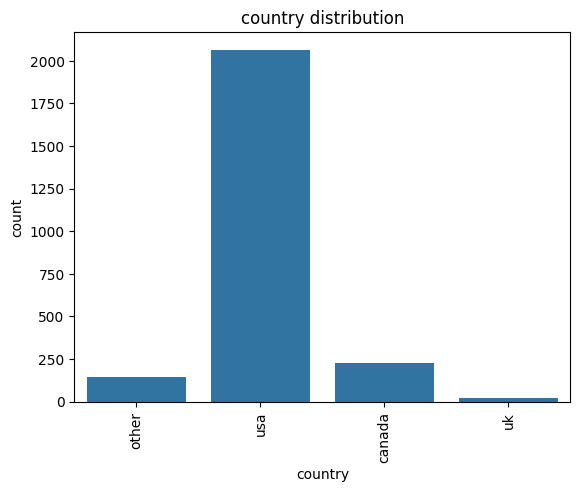

In [569]:
sns.countplot(x="country",data=df)
plt.title("country distribution")
plt.xticks(rotation=90)
plt.show()

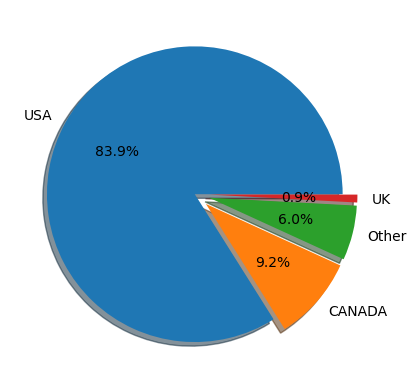

In [570]:
values =df["country"].value_counts()
plt.pie(values, labels = ["USA", "CANADA", "Other", "UK"], shadow = True, autopct = "%1.1f%%", explode = [0,0.1,0.1,0.1])
plt.show()

Most people from USA

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [571]:
df["area"].unique()

array([nan, 'NM', 'Virginia', 'or', 'exton pa', 'Colorado ', 'ontario',
       'Ontario', 'Wa', 'Quebec', 'NY', 'California', 'Texas', 'NEW YORK',
       'CO', 'IN', 'MN', 'aberdeenshire', 'Alberta', 'Wisconsin, 53705',
       'RI', 'NC', 'Scotland', 'minnesota', 'Michigan', 'Florida',
       'New Jersey', 'VA', 'Colorado', 'Los Angeles, California', 'CA',
       'New York ', 'Chicago, Illinois', 'Nj', 'Wisconsin', 'Minnesota ',
       'London', 'mn', 'TEXAS', 'Illinois', 'District of Columbia',
       'Washington', 'Massachusetts ', 'OR', 'Montana', 'New York',
       'massachusetts', 'Abu Dhabi', 'TX', 'Arizona', 'Dc', 'yukon',
       'Pennsylvania ', 'MD', 'Ohio', 'Alberta ', 'OXFORDSHIRE', 'DC',
       'Iowa', 'Mn', 'TN', 'BC', 'Maryland', 'MI', 'Wisconsin ', 'alaska',
       'Ny', 'Colorado, Jefferson county ', 'Louisiana', 'pa',
       'CO, Larimer County', 'Nebraska ', 'Oregon', 'UT', 'ny',
       'Pennsylvania', 'CDMX', 'north carolina', 'Tennessee ', 'Texas ',
       'Knox cou

In [572]:
df.drop('area', axis=1, inplace=True)
#lots of areas 433

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [573]:
df = df.drop(df[df.iloc[:,4:-6].isnull().all(axis=1)].index)

In [574]:
df.head(10)

,going out,gender,age,country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day,Daily Dish,Science,ESPN,Yahoo
1,No,Male,44.0,usa,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
3,No,Male,40.0,usa,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
4,No,Male,23.0,usa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
5,No,Male,42.0,other,JOY,DESPAIR,JOY,NaN,NaN,NaN,...,JOY,DESPAIR,DESPAIR,JOY,NaN,NaN,NaN,1.0,NaN,NaN
7,No,Male,33.0,canada,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Blue and black,Friday,NaN,1.0,NaN,NaN
8,No,Male,40.0,canada,JOY,DESPAIR,JOY,MEH,MEH,MEH,...,MEH,DESPAIR,DESPAIR,DESPAIR,Blue and black,Sunday,NaN,1.0,NaN,NaN
9,No,Female,53.0,usa,MEH,DESPAIR,JOY,MEH,MEH,MEH,...,MEH,DESPAIR,DESPAIR,MEH,White and gold,Sunday,NaN,1.0,NaN,NaN
11,No,Male,56.0,canada,JOY,MEH,JOY,MEH,MEH,JOY,...,MEH,JOY,DESPAIR,MEH,White and gold,Friday,NaN,1.0,NaN,NaN
12,No,Male,64.0,usa,MEH,MEH,JOY,MEH,MEH,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,MEH,White and gold,Sunday,NaN,1.0,NaN,NaN
13,Yes,Male,43.0,usa,JOY,DESPAIR,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Sunday,NaN,1.0,NaN,NaN


In [575]:
df.iloc[:,4:-6]=df.iloc[:,4:-6].fillna('MEH')

In [576]:
df.iloc[:,4:-6].isna().sum()

100 Grand Bar                                                                        0
Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)    0
Any full-sized candy bar                                                             0
Black Jacks                                                                          0
Bonkers (the candy)                                                                  0
                                                                                    ..
Vicodin                                                                              0
Whatchamacallit Bars                                                                 0
White Bread                                                                          0
Whole Wheat anything                                                                 0
York Peppermint Patties                                                              0
Length: 103, dtype: int64

### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [577]:
df["dress"].unique()

array(['White and gold', nan, 'Blue and black'], dtype=object)

In [578]:
df["dress"].isna().sum()/len(df)

0.04991680532445923

In [579]:
df["dress"].fillna("unknown",inplace=True)

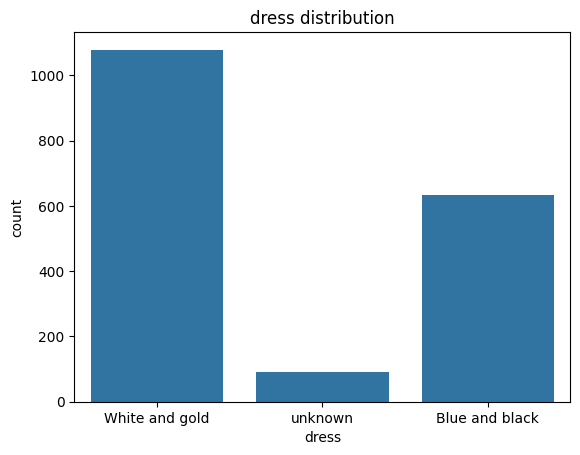

In [580]:
sns.countplot(x="dress",data=df)
plt.title("dress distribution")
plt.show()

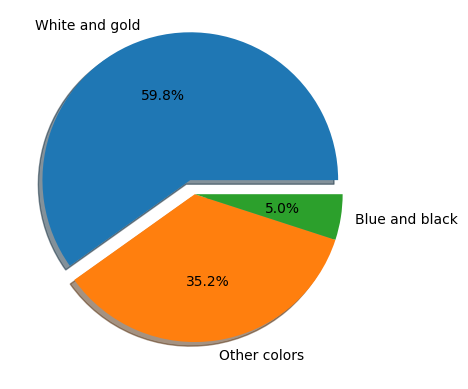

In [581]:
values = df["dress"].value_counts()
plt.pie(values, labels = ["White and gold", "Other colors", "Blue and black"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

Most people like dress white and gold

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [582]:
df["day"].value_counts()

day
Friday    1090
Sunday     643
Name: count, dtype: int64

In [583]:
df["day"].fillna("Other day",inplace=True)

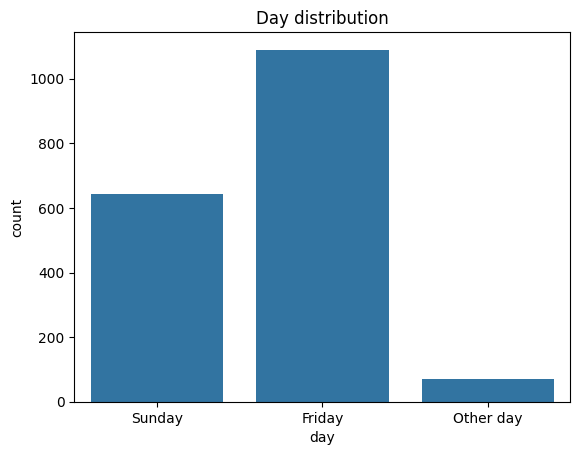

In [584]:
sns.countplot(x ="day", data = df)
plt.title("Day distribution")
plt.show()

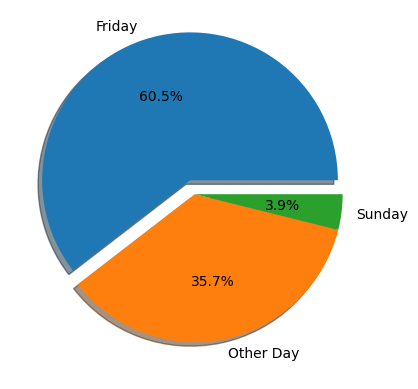

In [585]:
values = df["day"].value_counts()
plt.pie(values, labels = ["Friday", "Other Day", "Sunday"], shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

Most people prefer Friday

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values
- all the column are cleaing and ready for the next step `EDA`

In [591]:
# dealing with media columns
media = ['Daily Dish', 'Science', 'ESPN', 'Yahoo']
media_df = df[media]
media_df.head()

,Daily Dish,Science,ESPN,Yahoo
0,NaN,1.0,NaN,NaN
1,NaN,1.0,NaN,NaN
2,NaN,1.0,NaN,NaN
3,NaN,1.0,NaN,NaN
4,NaN,1.0,NaN,NaN


In [590]:

df.reset_index(inplace = True, drop = True)


,going out,gender,age,country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),...,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day,Daily Dish,Science,ESPN,Yahoo
0,No,Male,44.0,usa,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
1,No,Male,40.0,usa,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,NaN,1.0,NaN,NaN
2,No,Male,23.0,usa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,...,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,NaN,1.0,NaN,NaN
3,No,Male,42.0,other,JOY,DESPAIR,JOY,MEH,MEH,MEH,...,JOY,DESPAIR,DESPAIR,JOY,unknown,Other day,NaN,1.0,NaN,NaN
4,No,Male,33.0,canada,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Blue and black,Friday,NaN,1.0,NaN,NaN


In [592]:
website = []
for i in range(len(media_df)):
    flag = 1
    for m in media:
        if media_df.loc[i, m]==1.0:
            website.append(m)
            flag = 0
            break
    if flag:
         website.append('No answer')

In [593]:
df['website'] = website

In [594]:
df = df.drop(columns=media)

In [595]:
df.head()

,going out,gender,age,country,100 Grand Bar,Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Any full-sized candy bar,Black Jacks,Bonkers (the candy),Bonkers (the board game),...,Twix,"Vials of pure high fructose corn syrup, for main-lining into your vein",Vicodin,Whatchamacallit Bars,White Bread,Whole Wheat anything,York Peppermint Patties,dress,day,website
0,No,Male,44.0,usa,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,...,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,Science
1,No,Male,40.0,usa,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,...,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,DESPAIR,White and gold,Sunday,Science
2,No,Male,23.0,usa,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,...,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR,JOY,White and gold,Friday,Science
3,No,Male,42.0,other,JOY,DESPAIR,JOY,MEH,MEH,MEH,...,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,unknown,Other day,Science
4,No,Male,33.0,canada,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,...,JOY,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,Blue and black,Friday,Science


### 14 - write a summary about all the cleaning steps

Exploring the data

Drop the unimportant columns

Exchange the data type of column if it is not suitable

Clean each column from invalid data

Fill the NaN values in each column with the suitable value

Visualize a conclusion from the column after cleaning it

In [596]:
Joy = {}
for i in df.iloc[:,4:-3].columns:
    Joy[i] = df[i].value_counts()['JOY']

In [597]:
df2 = pd.DataFrame(data=Joy, index=['Count'])

In [598]:
df2 = df2.transpose()

In [599]:
df3 = df2.sort_values('Count', ascending=False).head(10)

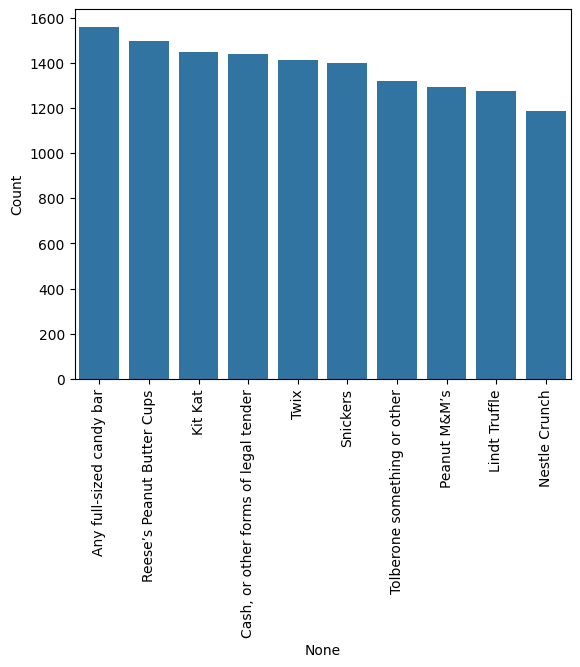

In [603]:
sns.barplot(data=df3, x=df3.index,y = "Count")
plt.xticks(rotation=90)
plt.show()

The 10 most loved chocolates

In [604]:
Despair = {}
for i in df.iloc[:,4:-3].columns:
    Despair[i] = df[i].value_counts()['DESPAIR']
data = pd.DataFrame(data=Despair, index=['Count'])
data = data.transpose()

In [605]:
data2 = data.sort_values('Count', ascending=False).head(10)

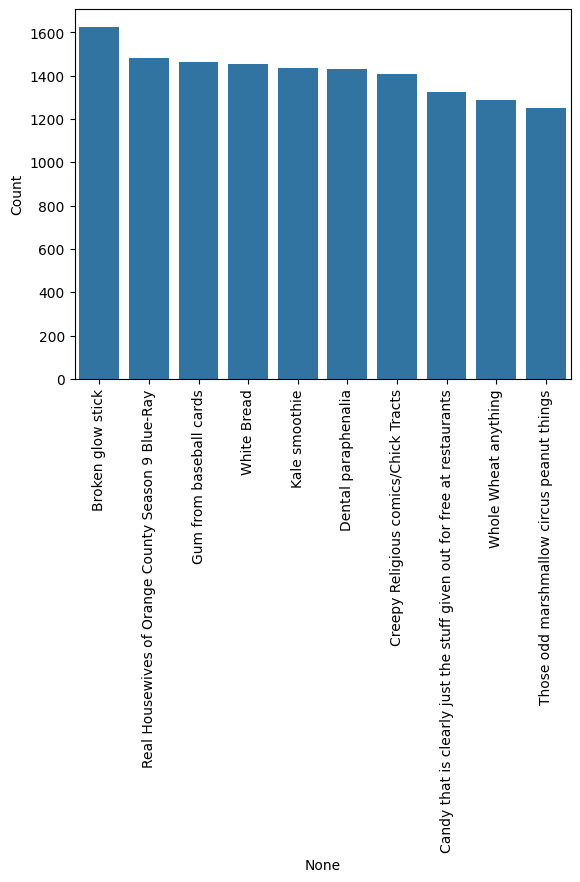

In [607]:
sns.barplot(data=data2, x=data2.index,y = "Count")
plt.xticks(rotation=90)
plt.show()

The 10 most hated chocolates


In [608]:
   df.to_csv("candy_cleaned.csv")